In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
org_options <- options()

# Figure 1

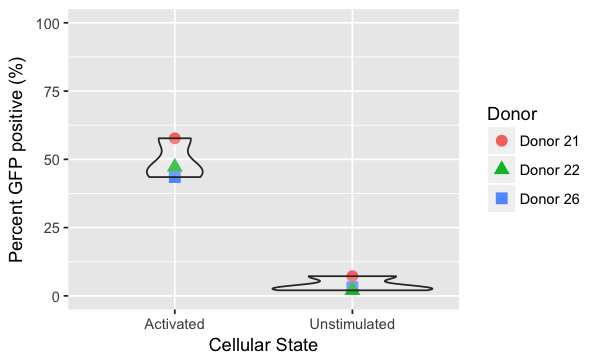

In [3]:
options(repr.plot.width=5, repr.plot.height=3)
read_tsv(
    'figure1.tsv',
    col_types=cols(
        `Donor`=col_factor(levels=c('Donor 21', 'Donor 22', 'Donor 26')),
        `Cellular State`=col_factor(levels=c('Activated', 'Unstimulated')),
        .default=col_double()
    )
) %>%
ggplot(aes(x=`Cellular State`, y=`Percent_GFP+`)) +
    geom_point(aes(group=`Donor`, color=`Donor`, shape=`Donor`), size=3) +
    geom_violin(aes(group=`Cellular State`), alpha=.2) +
    ylim(0, 100) +
    ylab('Percent GFP positive (%)')

# Figure 2

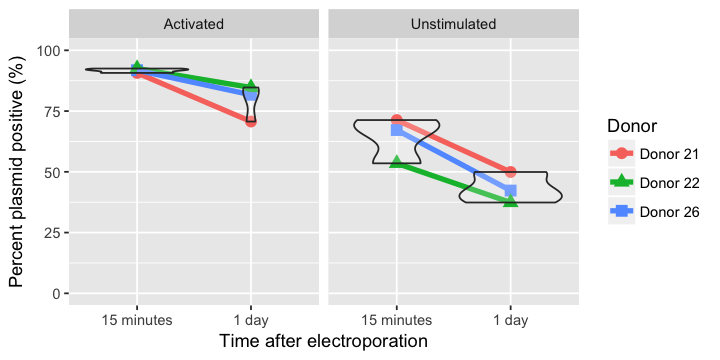

In [4]:
options(repr.plot.width=6, repr.plot.height=3)

read_tsv(
    'figure2.tsv',
    col_types=cols(
        `Donor`=col_factor(levels=c('Donor 21', 'Donor 22', 'Donor 26')),
        `Cellular State`=col_factor(levels=c('Activated', 'Unstimulated')),
        `Time after electroporation`=col_factor(levels=c('15 minutes', '1 day')),
        `Frequency of APC (+) cells`=col_double()
    )
) %>%
ggplot(aes(x=`Time after electroporation`, y=`Frequency of APC (+) cells`)) +
    geom_point(aes(group=`Donor`, color=`Donor`, shape=`Donor`), size=3) +
    geom_line(size=1.5, aes(group=`Donor`, color=`Donor`)) +
    geom_violin(aes(group=`Time after electroporation`), alpha=.2) +
    ylim(0, 100) +
    ylab('Percent plasmid positive (%)') +
    facet_wrap(~`Cellular State`)

# Figure 3

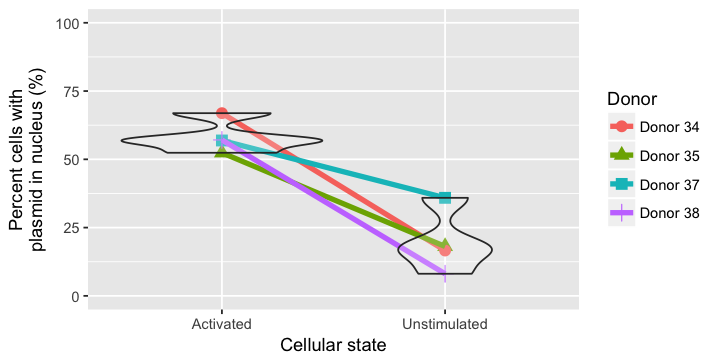

In [5]:
options(repr.plot.width=6, repr.plot.height=3)
read_tsv(
    'figure3.tsv',
    col_types=cols(
        `Donor`=col_factor(levels=c('Donor 34', 'Donor 35', 'Donor 37', 'Donor 38')),
        .default=col_double()
    )
) %>%
gather(
    key='Cellular state',
    value='Plasmid_nucleus',
    `Unstimulated`:`Activated`
) %>%
ggplot(aes(x=`Cellular state`, y=`Plasmid_nucleus`)) +
    geom_point(aes(color=`Donor`, shape=`Donor`), size=3) +
    geom_line(size=1.5, aes(group=`Donor`, color=`Donor`)) +
    geom_violin(aes(group=`Cellular state`), alpha=.2) +
    ylim(0, 100) +
    ylab('Percent cells with\nplasmid in nucleus (%)')